## Business Intelligence Assignment 2: Data Analytics

### (1) Data Understanding: Data Description Report presenting

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import typing
from scipy.stats import zscore
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [4]:
cwd = os.getcwd()

data_folder = os.path.join(cwd, 'data\\mid_processing')

file_path = os.path.join(data_folder, 'AB_US_2023_DATA_CLEANED.csv')
df = pd.read_csv(file_path, sep=",", dtype={'neighbourhood_group': 'str'}, low_memory=False)

df_base = df.copy()
display(df.head(3))

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco


### a. Attribute Types

In [5]:
def define_expected_dtypes():
    return {
        "id": "Integer",
        "name": "String",
        "host_id": "Integer",
        "host_name": "String",
        "neighbourhood_group": "String",
        "neighbourhood": "String",
        "latitude": "Float",
        "longitude": "Float",
        "room_type": "String",
        "price": "Integer",
        "minimum_nights": "Integer",
        "number_of_reviews": "Integer",
        "last_review": "Date",
        "reviews_per_month": "Float",
        "calculated_host_listings_count": "Integer",
        "availability_365": "Integer",
        "number_of_reviews_ltm": "Integer",
        "city": "String"
    }

### b. Statistical properties

In [57]:
# Statistical Calculations

column_dict = {
    'Column': [],
    'Mean': [],
    'Max': [],
    'Min': [],
    'Variance': [],
    'Std': [],
}

df_copy = df.copy()
df_copy.drop(columns=['id', 'host_id'], inplace=True)

for column in df_copy.columns:
    if df_copy[column].dtype == np.int32 or df_copy[column].dtype == np.int64 or df_copy[column].dtype == np.float64:
        column_dict['Column'].append(column)
        column_dict['Mean'].append(round(df_copy[column].mean(), 2))
        column_dict['Max'].append(round(df_copy[column].max(), 2))
        column_dict['Min'].append(round(df_copy[column].min(), 2))
        column_dict['Variance'].append(round(df_copy[column].var(), 2))
        column_dict['Std'].append(round(df_copy[column].std(), 2))


stats_df = pd.DataFrame(column_dict)
stats_df.set_index(['Column'], inplace=True)
display(stats_df)

,Mean,Max,Min,Variance,Std
Column,,,,,
neighbourhood,59634.57,98199.00,-1.00,1.225782e+09,35011.17
latitude,36.61,47.73,25.96,2.628000e+01,5.13
longitude,-98.30,-71.00,-123.09,3.883500e+02,19.71
price,259.56,100000.00,5.00,1.050238e+06,1024.81
minimum_nights,13.50,1250.00,1.00,7.797400e+02,27.92
number_of_reviews,40.91,3091.00,0.00,6.498650e+03,80.61
reviews_per_month,1.29,101.42,0.00,3.320000e+00,1.82
calculated_host_listings_count,29.89,1003.00,1.00,1.124249e+04,106.03
availability_365,181.05,365.00,0.00,1.814328e+04,134.70


### c. Data quality

#### Check for Datatype Inconsistencies

In [58]:
def check_type_inconsistencies(df):
    inconsistent_columns = {
        'Column': [],
        'Unique Types Count': []
    }
    
    for column in df.columns:
        unique_types = df[column].map(type).nunique()
        if unique_types > 1:
            inconsistent_columns['Column'].append(column)
            inconsistent_columns['Unique Types Count'].append(unique_types)
    
    inconsistencies_df = pd.DataFrame(inconsistent_columns)
    inconsistencies_df.set_index(['Column'], inplace=True)
    return inconsistencies_df

In [59]:
type_inconsistencies_df = check_type_inconsistencies(df)
display(type_inconsistencies_df)

,Unique Types Count
Column,


#### Check for Missing-Values

In [60]:
def check_missing_values(df):
    relevant_columns = [col for col in df.columns if not col.endswith('_zscore')]
    missing_values = df[relevant_columns].isnull().sum()
    
    missing_values_df = pd.DataFrame({
        'Attribute': missing_values.index,
        'Missing Values Count': missing_values.values,
        'Missing Values Percent': (missing_values.values / len(df) * 100).round(2)
    })
    
    missing_values_df.set_index('Attribute', inplace=True)
    return missing_values_df

In [61]:
missing_values_df = check_missing_values(df)
display(missing_values_df)

,Missing Values Count,Missing Values Percent
Attribute,,
id,0,0.0
name,0,0.0
host_id,0,0.0
neighbourhood,0,0.0
latitude,0,0.0
longitude,0,0.0
room_type,0,0.0
price,0,0.0
minimum_nights,0,0.0


#### Z-Score based extreme value detection

In [62]:
def get_extreme_value_columns():
    return [
        "latitude", "longitude", "price", "minimum_nights",
        "number_of_reviews", "reviews_per_month",
        "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm"
    ]

def check_extreme_values_zscore(df):
    extreme_value_columns = get_extreme_value_columns()
    extreme_value_results = {}
    for column in extreme_value_columns:
        if column in df.columns:
            # Convert the column to numeric, coercing errors to NaN
            df[column] = pd.to_numeric(df[column], errors='coerce')
            # Drop NaN values before calculating the z-score
            df[column + "_zscore"] = zscore(df[column].dropna())
            # Get extreme values based on z-scores
            low_extreme_values = df[df[column + "_zscore"] < -3][column]
            high_extreme_values = df[df[column + "_zscore"] > 3][column]
            extreme_value_results[column] = {
                "Low Z-Score Values (< -3)": f"{low_extreme_values.min()} to {low_extreme_values.max()}" if not low_extreme_values.empty else "No values",
                "High Z-Score Values (> 3)": f"{high_extreme_values.min()} to {high_extreme_values.max()}" if not high_extreme_values.empty else "No values"
            }
    return extreme_value_results

In [63]:
extreme_value_results = check_extreme_values_zscore(df)
print("\nExtreme Values per Attribute using Z-Score Method:")
for column, details in extreme_value_results.items():
    print(f"\nAttribute: {column}")
    print(f"  Z-Score Values below -3: {details['Low Z-Score Values (< -3)']}")
    print(f"  Z-Score Values above 3: {details['High Z-Score Values (> 3)']}")


Extreme Values per Attribute using Z-Score Method:

Attribute: latitude
  Z-Score Values below -3: No values
  Z-Score Values above 3: No values

Attribute: longitude
  Z-Score Values below -3: No values
  Z-Score Values above 3: No values

Attribute: price
  Z-Score Values below -3: No values
  Z-Score Values above 3: 3334 to 100000

Attribute: minimum_nights
  Z-Score Values below -3: No values
  Z-Score Values above 3: 98 to 1250

Attribute: number_of_reviews
  Z-Score Values below -3: No values
  Z-Score Values above 3: 283 to 3091

Attribute: reviews_per_month
  Z-Score Values below -3: No values
  Z-Score Values above 3: 6.76 to 101.42

Attribute: calculated_host_listings_count
  Z-Score Values below -3: No values
  Z-Score Values above 3: 356 to 1003

Attribute: availability_365
  Z-Score Values below -3: No values
  Z-Score Values above 3: No values

Attribute: number_of_reviews_ltm
  Z-Score Values below -3: No values
  Z-Score Values above 3: 74 to 1314


#### Check for inconsistencies based on various rules and display examples

- Check for unique and consistent ID
- Verify consistency in host names for the same host ID
- Room Type Checks
  - Check for allowed room types
  - Check for consistent spelling in room_type
  - Check for non-numeric values in room_type
- Latitude and Longitude Checks
- City Checks
  - City Checks for consistent spelling
  - Check for non-numeric values in city
- Neighbourhood Checks
  - Check neighbourhoods variants
  - Check for non-numeric values in neighbourhood
- Check for non-positive values in price

In [64]:
# Global column existence check
def column_exists(df, column):
    return column in df.columns

In [65]:
def check_for_inconsistencies(df):
    results = []

    # Function to add results
    def add_result(attribute, check, result):
        results.append({'Attribute': attribute, 'Check': check, 'Result': result})

    # Generic range check
    def check_range(column, min_val, max_val, label):
        if column_exists(df, column):
            invalid_values = df[(df[column] < min_val) | (df[column] > max_val)][column].unique()
            add_result(column, label, f"Out of range values: {invalid_values[:2]}" if len(invalid_values) > 0 else "Consistent")

    # Unique ID check
    if column_exists(df, 'id'):
        duplicate_ids = df[df['id'].duplicated()]['id'].unique()
        add_result('id', 'Unique IDs', f"Duplicates found: {duplicate_ids[:2]}" if len(duplicate_ids) > 0 else "Consistent")
        
    # Consistency of host IDs and names
    if column_exists(df, 'host_id') and column_exists(df, 'host_name'):
        inconsistent_host_names = df.groupby('host_id')['host_name'].nunique()
        inconsistent_ids = inconsistent_host_names[inconsistent_host_names > 1].index
        add_result('host_name', 'Consistency in host names', f"Inconsistent host names for IDs: {list(inconsistent_ids)[:2]}" if len(inconsistent_ids) > 0 else "Consistent")

    # Room type check
    if column_exists(df, 'room_type'):
        allowed_room_types = {"Private room", "Entire home/apt", "Hotel room", "Shared room"}
        invalid_room_types = df[~df['room_type'].isin(allowed_room_types)]['room_type'].unique()
        add_result('room_type', 'Allowed Room Types', f"Invalid room types: {invalid_room_types[:2]}" if len(invalid_room_types) > 0 else "Consistent")
        unique_room_types = df['room_type'].str.lower().unique()
        add_result('room_type', 'Consistent Spelling', f"Inconsistent spelling in room_type: {df['room_type'].unique()[:2]}" if len(unique_room_types) > len(allowed_room_types) else "Consistent")

     # Latitude and longitude range checks
    check_range('latitude', -90, 90, 'Latitude within -90 to 90')
    check_range('longitude', -180, 180, 'Longitude within -180 to 180')
    
    # Consistency in city names
    if column_exists(df, 'city'):
        city_variants = {}
        inconsistent_cities = []
        for city in df['city'].unique():
            normalized = city.strip().lower()
            if normalized in city_variants and city_variants[normalized] != city:
                inconsistent_cities.append(f"{city_variants[normalized]} vs {city}")
            city_variants[normalized] = city
        add_result('city', 'Consistent Spelling', f"Inconsistent spelling: {inconsistent_cities[:2]}" if inconsistent_cities else "Consistent")

    # Positive prices
    if column_exists(df, 'price'):
        invalid_prices = df[df['price'] <= 0]['price'].unique()
        add_result('price', 'Positive prices', f"Non-positive values: {invalid_prices[:2]}" if len(invalid_prices) > 0 else "Consistent")

    # Numeric neighbourhood check
    if column_exists(df, 'neighbourhood'):
        non_numeric_neighborhoods = df[~df['neighbourhood'].apply(lambda x: isinstance(x, int))]['neighbourhood'].unique()
        add_result('neighbourhood', 'Numeric values', f"Non-numeric values: {non_numeric_neighborhoods[:2]}" if len(non_numeric_neighborhoods) > 0 else "Consistent")

    return pd.DataFrame(results)

In [66]:
results_df = check_for_inconsistencies(df)
display(results_df)

,Attribute,Check,Result
0,id,Unique IDs,Consistent
1,room_type,Allowed Room Types,Consistent
2,room_type,Consistent Spelling,Consistent
3,latitude,Latitude within -90 to 90,Consistent
4,longitude,Longitude within -180 to 180,Consistent
5,city,Consistent Spelling,Consistent
6,price,Positive prices,Consistent
7,neighbourhood,Numeric values,Consistent


### d. Visual exploration

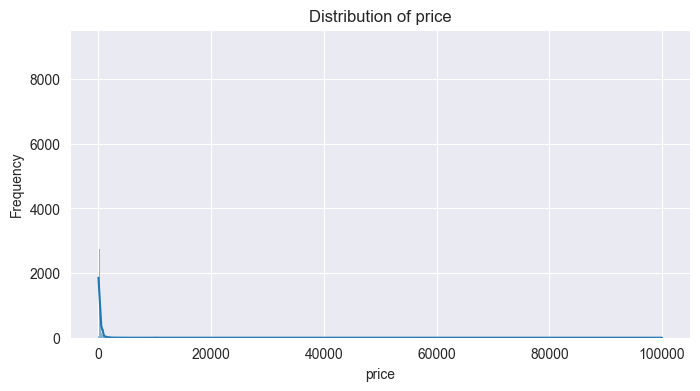

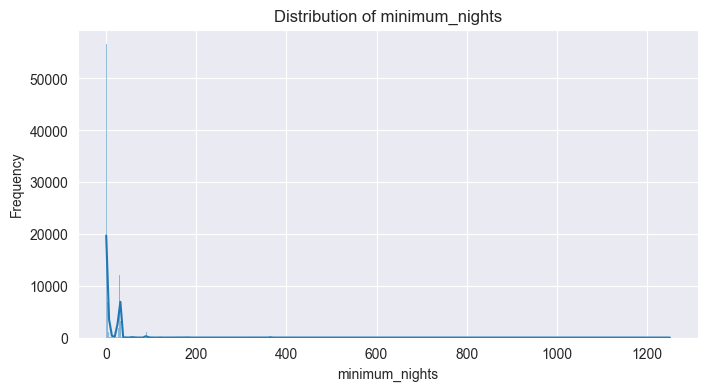

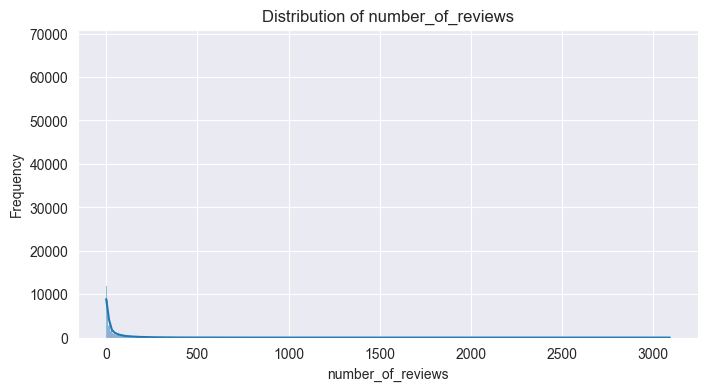

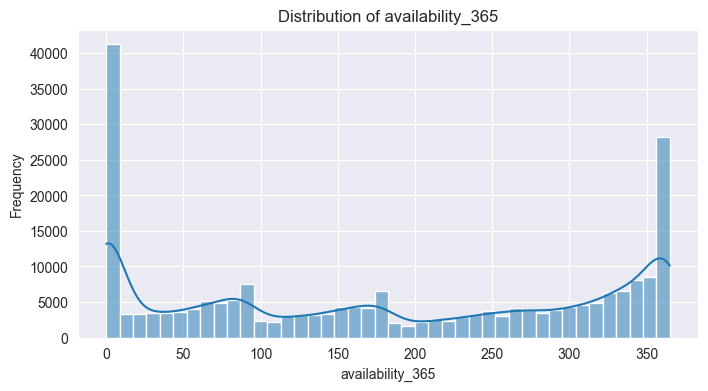

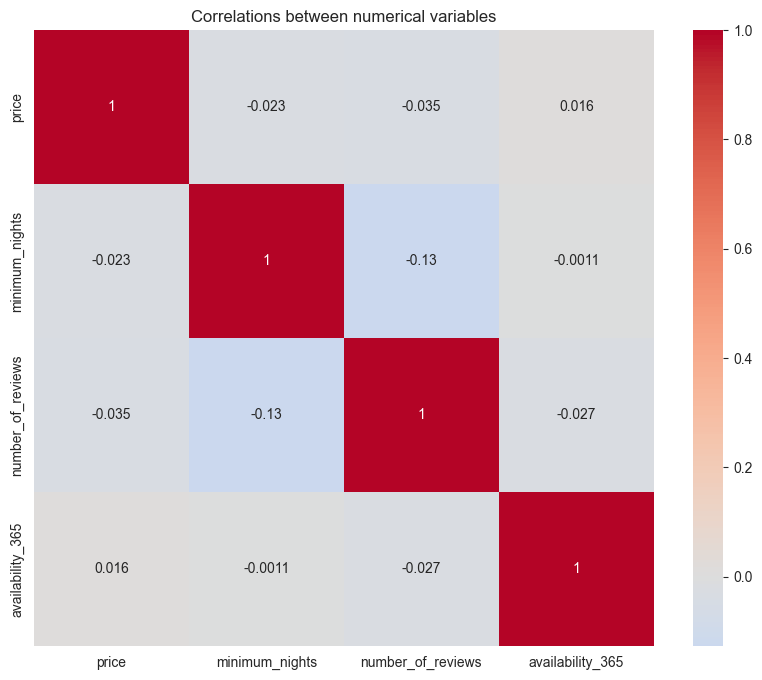

Column 'neighbourhood_group' is missing, skipping count plot.


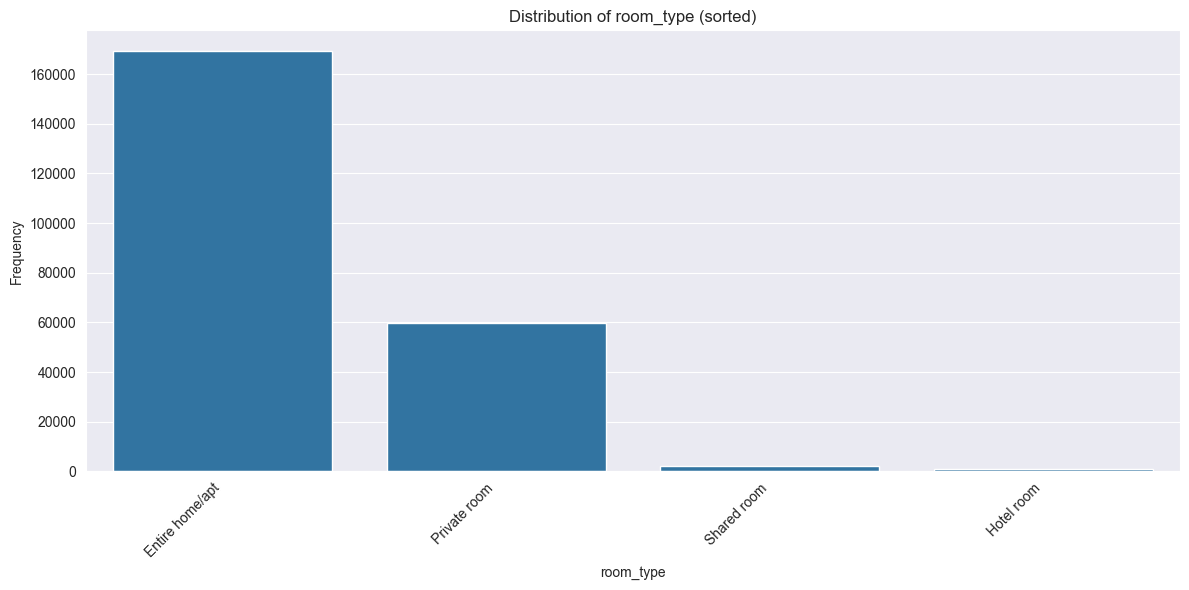

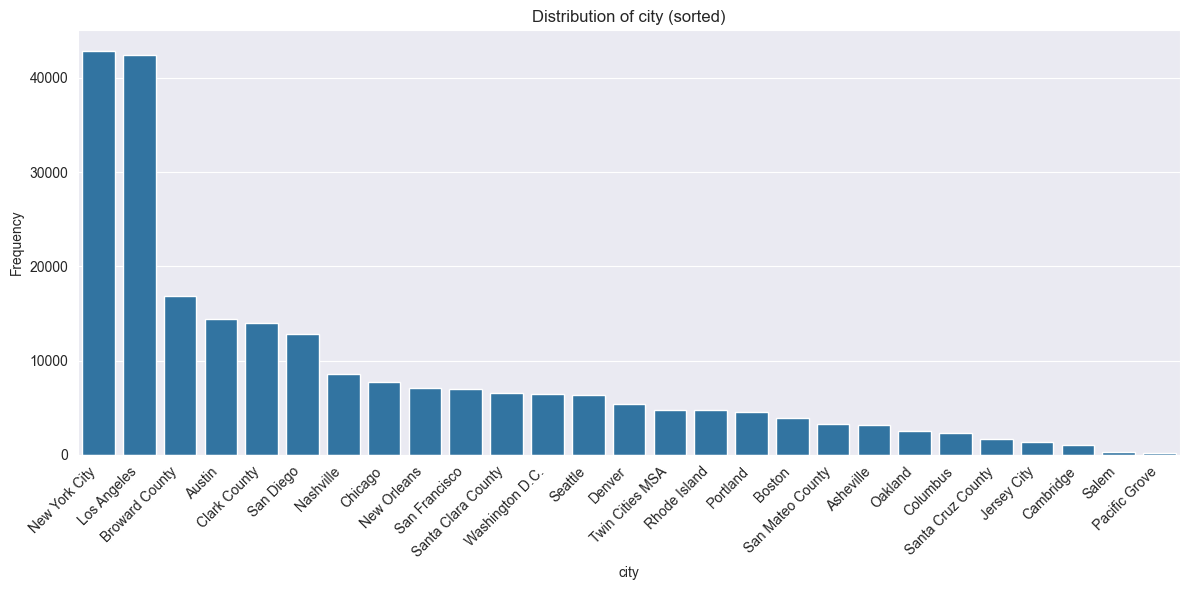

In [67]:
numerical_variables = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']

# Histograms for numerical variables
for var in numerical_variables:
    if column_exists(df, var):
        plt.figure(figsize=(8, 4))
        sns.histplot(df[var], kde=True)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel("Frequency")
        plt.show()
    else:
        print(f"Column '{var}' is missing, skipping histogram.")

# Heatmap for visualizing correlations
available_numerical_vars = [var for var in numerical_variables if column_exists(df, var)]
if available_numerical_vars:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[available_numerical_vars].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title("Correlations between numerical variables")
    plt.show()
else:
    print("No numerical columns available for correlation heatmap.")

categorical_variables = ['neighbourhood_group', 'room_type', 'city']

# Count plots for categorical variables
for var in categorical_variables:
    if column_exists(df, var):
        plt.figure(figsize=(12, 6))
        sorted_order = df[var].value_counts().index
        sns.countplot(data=df, x=var, order=sorted_order)
        plt.title(f'Distribution of {var} (sorted)')
        plt.xlabel(var)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{var}' is missing, skipping count plot.")

### e. Ethically sensitive

In [68]:
if column_exists(df, 'neighbourhood_group'):
    print("\n--- Neighbourhood Group Distribution ---")
    print(df['neighbourhood_group'].value_counts().to_frame().rename(columns={'neighbourhood_group': 'Count'}))
else:
    print("\n--- Column 'neighbourhood_group' is missing, skipping distribution. ---")

# Room Type Distribution
if column_exists(df, 'room_type'):
    print("\n--- Room Type Distribution ---")
    print(df['room_type'].value_counts().to_frame().rename(columns={'room_type': 'Count'}))
else:
    print("\n--- Column 'room_type' is missing, skipping distribution. ---")

# City Distribution
if column_exists(df, 'city'):
    print("\n--- City Distribution ---")
    print(df['city'].value_counts().to_frame().rename(columns={'city': 'Count'}))
else:
    print("\n--- Column 'city' is missing, skipping distribution. ---")

# Numerical Variables Distribution
print("\n--- Numerical Variables Distribution ---")
for var in numerical_variables:
    if column_exists(df, var):
        description = df[var].describe()
        print(f"\nVariable: {var}")
        print(f"Minimum: {description['min']}")
        print(f"Maximum: {description['max']}")
        print(f"Mean: {description['mean']:.2f}")
        print(f"Median: {description['50%']:.2f}")
        print(f"Standard Deviation: {description['std']:.2f}")
        print(f"25th Percentile: {description['25%']:.2f}")
        print(f"75th Percentile: {description['75%']:.2f}")
    else:
        print(f"\nVariable: {var} is missing, skipping statistics.")


--- Column 'neighbourhood_group' is missing, skipping distribution. ---

--- Room Type Distribution ---
                  count
room_type              
Entire home/apt  169140
Private room      59758
Shared room        2276
Hotel room          893

--- City Distribution ---
                    count
city                     
New York City       42904
Los Angeles         42437
Broward County      16895
Austin              14365
Clark County        13933
San Diego           12868
Nashville            8547
Chicago              7745
New Orleans          7048
San Francisco        6933
Santa Clara County   6528
Washington D.C.      6453
Seattle              6375
Denver               5361
Twin Cities MSA      4764
Rhode Island         4742
Portland             4581
Boston               3862
San Mateo County     3235
Asheville            3161
Oakland              2499
Columbus             2344
Santa Cruz County    1639
Jersey City          1314
Cambridge            1026
Salem                 

In [87]:
print(df_base.columns)

Index(['host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')


### f. Data Preprocessing

In [89]:


def pre_processing(data : pd.DataFrame):
    
    #data.drop(columns='name', inplace=True)  # Drop useless columns
    #data.drop(columns='neighbourhood_group', inplace=True)
    
    
    # Fill columns with 0 where there are no reviews
    data[['last_review', 'reviews_per_month']] = data[['last_review', 'reviews_per_month']].fillna(value=0)
    data_price_outlier = data[data['price'] < 5]  # detect and handle price outliers
    # Apply drop by using index of filtered Dataframe (applying frame on its own does not work, only index works)
    data.drop(data_price_outlier.index, inplace=True)

    # Handling duplicate IDs
    # duplicate Listing IDs resemble an actual listing mistake, will retain the one with more information
    data_duplicate = data[data['id'].duplicated()].index
    data.drop(data_duplicate, inplace=True)
    data.set_index('id', inplace=True)
    
    return data

In [90]:
data_processed = pre_processing(df_base)

                                                   name  host_id  \
id                                                                 
958               Bright, Modern Garden Unit - 1BR/1BTH     1169   
5858                                 Creative Sanctuary     8904   
8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   
8339                    Historic Alamo Square Victorian    24215   
8739                Mission Sunshine, with Private Bath     7149   

      neighbourhood  latitude  longitude        room_type  price  \
id                                                                 
958           94117  37.77028 -122.43317  Entire home/apt    202   
5858          94110  37.74474 -122.42089  Entire home/apt    235   
8142          94117  37.76555 -122.45213     Private room     56   
8339          94117  37.77564 -122.43642  Entire home/apt    575   
8739          94110  37.76030 -122.42197     Private room    110   

      minimum_nights  number_of_reviews last_r

### g. ZIP-Code generation

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.errors import ShapelyDeprecationWarning
import warnings

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
zcta_shapefile_path = r'PATH_TO_DOWNLOADED_FILE_tl_2024_us_zcta520.shp'
zcta = gpd.read_file(zcta_shapefile_path)
zcta = zcta.to_crs(epsg=4326)
zcta.sindex


def get_zip_code(latitude, longitude):
    try:
        # point object or long / lat parameters
        point = Point(longitude, latitude)
        possible_matches_index = list(zcta.sindex.intersection(point.bounds))
        possible_matches = zcta.iloc[possible_matches_index]

        # identify point in dataset
        for idx, row in possible_matches.iterrows():
            if row['geometry'].contains(point):
                return row['ZCTA5CE20']  # return zipcode

        # error handling
        return None
    except Exception as e:
        print(f"Error processing point ({latitude}, {longitude}): {e}")
        return None
    

data_processed['neighbourhood'] = data_processed.apply(lambda row: get_zip_code(row['latitude'], row['longitude']), axis=1)
print(data_processed, data_processed['neighbourhood'])
data_processed['neighbourhood'] = pd.to_numeric(data_processed['neighbourhood'])
data_processed['neighbourhood'] = data_processed['neighbourhood'].fillna(-1)  # Replace NaN with -1
data_processed['neighbourhood'] = data_processed['neighbourhood'].astype(int)
print(data_processed['neighbourhood'].dtype)
 


                                                                 name  \
id                                                                      
958                             Bright, Modern Garden Unit - 1BR/1BTH   
5858                                               Creative Sanctuary   
8142                Friendly Room Apt. Style -UCSF/USF - San Franc...   
8339                                  Historic Alamo Square Victorian   
8739                              Mission Sunshine, with Private Bath   
...                                                               ...   
849230448624862502  Private Half Moon Bay Oasis By Pillar Point Be...   
850805127216414630                                      Home near SFO   
851562104616413652                   Modern New Private Studio in SFO   
851792795339759410            Lux Bedroom with a Shared Bath near SFO   
851801296770555568             Lux Bedroom with Private Bath near SFO   

                      host_id neighbourhood   lati